# Minist Dataset Example

In [2]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']= '0'

In [11]:
X_train[0].shape

(28, 28)

<Figure size 432x288 with 0 Axes>

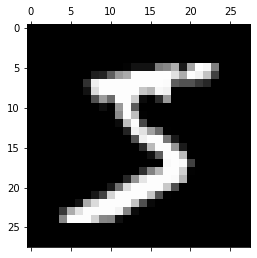

In [12]:
plt.gray() 
plt.matshow(X_train[0]) 
plt.show() 

In [13]:
y_train[0]

5

In [14]:
input_shape = (28, 28, 1)

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 16s 5ms/step - loss: 0.2337 - accuracy: 0.9424 - val_loss: 0.0769 - val_accuracy: 0.9771
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0638 - accuracy: 0.9804 - val_loss: 0.0600 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.0577 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0463 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.0464 - val_accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0619 - val_ac

313/313 - 1s - loss: 0.0564 - accuracy: 0.9894 - 965ms/epoch - 3ms/step


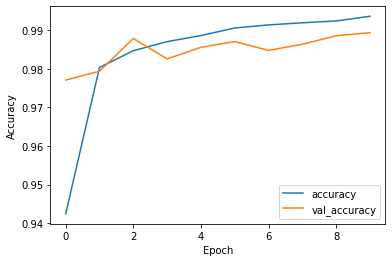

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)